# PatchMatch Matching Example

### Import Required Libraries and Packages

In [25]:
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
module_path = os.path.abspath(os.path.join('..', 'modules'))

if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from patchmatch import PatchMatch

### PatchMatch Matching Example (ORB)

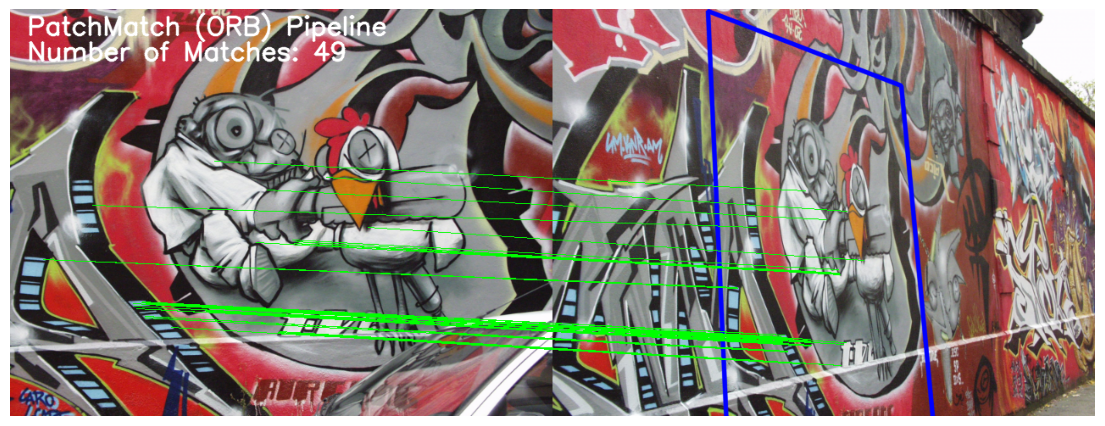

In [22]:
image_1_path = os.path.abspath(os.path.join('..', 'data/hpatches-resized/v_graffiti/1.ppm'))
image_2_path = os.path.abspath(os.path.join('..', 'data/hpatches-resized/v_graffiti/5.ppm'))
image_1 = cv2.cvtColor(cv2.imread(image_1_path), cv2.COLOR_BGR2RGB)
image_2 = cv2.cvtColor(cv2.imread(image_2_path), cv2.COLOR_BGR2RGB)
pm = PatchMatch(match_feature='ORB', num_features=1000, model_confidence=0.99)
pts_1, pts_2 = pm.match_two_images(image_1, image_2)

H, inliers = cv2.findHomography(pts_1, pts_2, cv2.RANSAC, 5.0)
inliers = inliers.flatten()
pts_1 = pts_1[inliers == 1]
pts_2 = pts_2[inliers == 1]

h1, w1 = image_1.shape[0], image_1.shape[1]
corners_image_1 = np.array([[0, 0], [0, h1], [w1, h1], [w1, 0]], dtype=np.float32).reshape(-1, 1, 2)
transformed_corners = cv2.perspectiveTransform(corners_image_1, H)

cv2.polylines(image_2, [np.int32(transformed_corners)], True, (0, 0, 255), 3, cv2.LINE_AA)

combined_image = np.hstack((image_1, image_2))

for index in range(len(pts_1)):
    cv2.line(combined_image, (pts_1[index][0], pts_1[index][1]), (pts_2[index][0] + image_1.shape[1],  pts_2[index][1]), (0, 255, 0), 1)

cv2.putText(combined_image, f'PatchMatch (ORB) Pipeline', (20, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
cv2.putText(combined_image, f'Number of Matches: {len(pts_1)}', (20, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

plt.figure(figsize=(14, 8))
plt.imshow(combined_image)
plt.axis('off')
plt.savefig(os.path.abspath(os.path.join('..', 'media/patchmatch.png')), bbox_inches='tight', pad_inches=0)
plt.show()

### ORB Matching Example

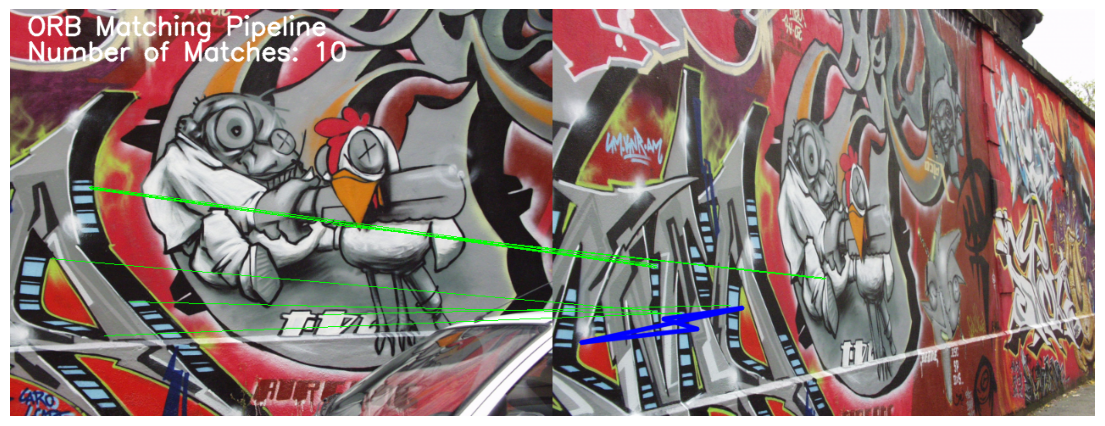

In [23]:
image_1_path = os.path.abspath(os.path.join('..', 'data/hpatches-resized/v_graffiti/1.ppm'))
image_2_path = os.path.abspath(os.path.join('..', 'data/hpatches-resized/v_graffiti/5.ppm'))
image_1 = cv2.cvtColor(cv2.imread(image_1_path), cv2.COLOR_BGR2RGB)
image_2 = cv2.cvtColor(cv2.imread(image_2_path), cv2.COLOR_BGR2RGB)
image_1_gray = cv2.cvtColor(image_1, cv2.COLOR_RGB2GRAY)
image_2_gray = cv2.cvtColor(image_2, cv2.COLOR_RGB2GRAY)

orb = cv2.ORB_create(nfeatures=1000)
keypoints1, descriptors1 = orb.detectAndCompute(image_1_gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(image_2_gray, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bf.match(descriptors1, descriptors2)

matches = sorted(matches, key = lambda x:x.distance)

points1 = []
points2 = []

for match in matches:
    points1.append(keypoints1[match.queryIdx].pt)
    points2.append(keypoints2[match.trainIdx].pt)

points1 = np.array(points1, dtype=np.int32)
points2 = np.array(points2, dtype=np.int32)

H, inliers = cv2.findHomography(points1, points2, cv2.RANSAC, 5.0)
inliers = inliers.flatten()
pts_1 = points1[inliers == 1]
pts_2 = points2[inliers == 1]

h1, w1 = image_1_gray.shape
corners_image_1 = np.array([[0, 0], [0, h1], [w1, h1], [w1, 0]], dtype=np.float32).reshape(-1, 1, 2)
transformed_corners = cv2.perspectiveTransform(corners_image_1, H)

cv2.polylines(image_2, [np.int32(transformed_corners)], True, (0, 0, 255), 3, cv2.LINE_AA)

combined_image = np.hstack((image_1, image_2))

for index in range(len(pts_1)):
    cv2.line(combined_image, (pts_1[index][0], pts_1[index][1]), (pts_2[index][0] + image_1.shape[1],  pts_2[index][1]), (0, 255, 0), 1)

cv2.putText(combined_image, f'ORB Matching Pipeline', (20, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
cv2.putText(combined_image, f'Number of Matches: {len(pts_1)}', (20, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

plt.figure(figsize=(14, 8))
plt.imshow(combined_image)
plt.axis('off')
plt.savefig(os.path.abspath(os.path.join('..', 'media/orb.png')), bbox_inches='tight', pad_inches=0)
plt.show()

### PatchMatch Matching Example (SIFT)

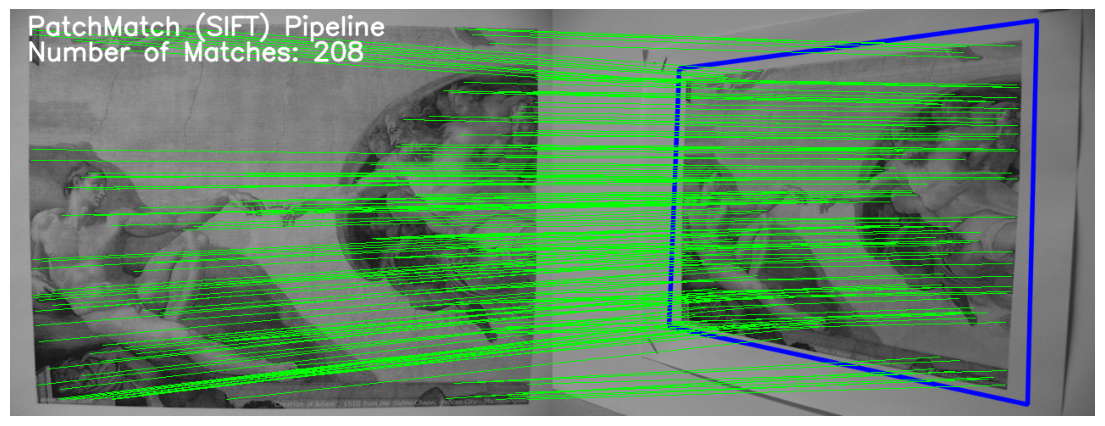

In [15]:
image_1_path = os.path.abspath(os.path.join('..', 'data/hpatches-resized/v_adam/1.ppm'))
image_2_path = os.path.abspath(os.path.join('..', 'data/hpatches-resized/v_adam/3.ppm'))
image_1 = cv2.cvtColor(cv2.imread(image_1_path), cv2.COLOR_BGR2RGB)
image_2 = cv2.cvtColor(cv2.imread(image_2_path), cv2.COLOR_BGR2RGB)
pm = PatchMatch(match_feature='SIFT', num_features=500)
pts_1, pts_2 = pm.match_two_images(image_1, image_2)

H, inliers = cv2.findHomography(pts_1, pts_2, cv2.RANSAC, 5.0)
inliers = inliers.flatten()
pts_1 = pts_1[inliers == 1]
pts_2 = pts_2[inliers == 1]

h1, w1 = image_1.shape[0], image_1.shape[1]
corners_image_1 = np.array([[0, 0], [0, h1], [w1, h1], [w1, 0]], dtype=np.float32).reshape(-1, 1, 2)
transformed_corners = cv2.perspectiveTransform(corners_image_1, H)

cv2.polylines(image_2, [np.int32(transformed_corners)], True, (0, 0, 255), 3, cv2.LINE_AA)

combined_image = np.hstack((image_1, image_2))

for index in range(len(pts_1)):
    cv2.line(combined_image, (pts_1[index][0], pts_1[index][1]), (pts_2[index][0] + image_1.shape[1],  pts_2[index][1]), (0, 255, 0), 1)

cv2.putText(combined_image, f'PatchMatch (SIFT) Pipeline', (20, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
cv2.putText(combined_image, f'Number of Matches: {len(pts_1)}', (20, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

plt.figure(figsize=(14, 8))
plt.imshow(combined_image)
plt.axis('off')
plt.show()

### SIFT Matching Example

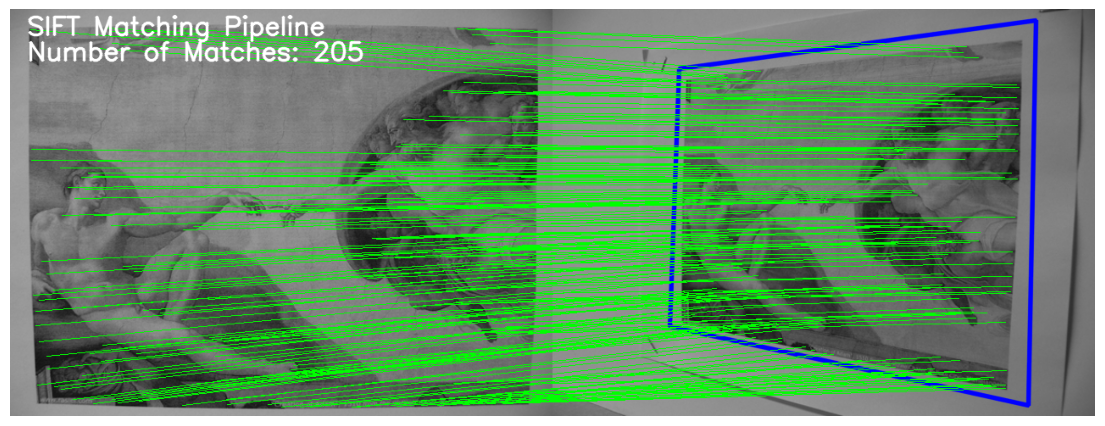

In [16]:
image_1_path = os.path.abspath(os.path.join('..', 'data/hpatches-resized/v_adam/1.ppm'))
image_2_path = os.path.abspath(os.path.join('..', 'data/hpatches-resized/v_adam/3.ppm'))
image_1 = cv2.cvtColor(cv2.imread(image_1_path), cv2.COLOR_BGR2RGB)
image_2 = cv2.cvtColor(cv2.imread(image_2_path), cv2.COLOR_BGR2RGB)
image_1_gray = cv2.cvtColor(image_1, cv2.COLOR_RGB2GRAY)
image_2_gray = cv2.cvtColor(image_2, cv2.COLOR_RGB2GRAY)

sift = cv2.SIFT_create(nfeatures=500)
keypoints1, descriptors1 = sift.detectAndCompute(image_1_gray, None)
keypoints2, descriptors2 = sift.detectAndCompute(image_2_gray, None)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

matches = bf.match(descriptors1, descriptors2)

matches = sorted(matches, key = lambda x:x.distance)

points1 = []
points2 = []

for match in matches:
    points1.append(keypoints1[match.queryIdx].pt)
    points2.append(keypoints2[match.trainIdx].pt)

points1 = np.array(points1, dtype=np.int32)
points2 = np.array(points2, dtype=np.int32)

H, inliers = cv2.findHomography(points1, points2, cv2.RANSAC, 5.0)
inliers = inliers.flatten()
pts_1 = points1[inliers == 1]
pts_2 = points2[inliers == 1]

h1, w1 = image_1_gray.shape
corners_image_1 = np.array([[0, 0], [0, h1], [w1, h1], [w1, 0]], dtype=np.float32).reshape(-1, 1, 2)
transformed_corners = cv2.perspectiveTransform(corners_image_1, H)

cv2.polylines(image_2, [np.int32(transformed_corners)], True, (0, 0, 255), 3, cv2.LINE_AA)

combined_image = np.hstack((image_1, image_2))

for index in range(len(pts_1)):
    cv2.line(combined_image, (pts_1[index][0], pts_1[index][1]), (pts_2[index][0] + image_1.shape[1],  pts_2[index][1]), (0, 255, 0), 1)

cv2.putText(combined_image, f'SIFT Matching Pipeline', (20, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
cv2.putText(combined_image, f'Number of Matches: {len(pts_1)}', (20, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

plt.figure(figsize=(14, 8))
plt.imshow(combined_image)
plt.axis('off')
plt.show()